In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import BaggingClassifier

In [2]:
heart = pd.read_csv("heart_cleveland.csv")

In [3]:
heart_df = heart.copy()

# Renaming some of the columns
heart_df = heart_df.rename(columns={'condition': 'target'})
print(heart_df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  target  
0   1     0       0  
1   2     0       0  
2   0     0       0  
3   1     0       1  
4   0     0       0  


In [4]:
print(heart_df.keys())

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [5]:
#fixing our data in x and y. Here y contains target data and X contains rest all the features.
xData = heart_df.drop(columns='target')
y = heart_df.target

In [6]:
# Normalize
x = (xData - np.min(xData)) / (np.max(xData) - np.min(xData)).values

In [7]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.833333,1.0,0.0,0.622642,0.246575,1.0,1.0,0.458015,0.0,0.016129,0.5,0.333333,0.0
1,0.833333,0.0,0.0,0.433962,0.257991,0.0,0.0,0.610687,0.0,0.290323,0.0,0.666667,0.0
2,0.770833,0.0,0.0,0.528302,0.228311,0.0,0.0,0.328244,0.0,0.419355,1.0,0.000000,0.0
3,0.750000,1.0,0.0,0.415094,0.356164,1.0,1.0,0.786260,0.0,0.225806,0.5,0.333333,0.0
4,0.729167,1.0,0.0,0.150943,0.194064,0.0,1.0,0.557252,1.0,0.290323,0.5,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.229167,1.0,1.0,0.547170,0.221461,0.0,0.0,0.839695,0.0,0.000000,0.0,0.000000,1.0
293,0.208333,1.0,1.0,0.226415,0.212329,0.0,0.0,0.526718,0.0,0.193548,0.5,0.000000,1.0
294,0.125000,1.0,1.0,0.245283,0.164384,0.0,0.0,0.450382,1.0,0.258065,0.5,0.000000,1.0
295,0.125000,0.0,1.0,0.415094,0.130137,0.0,0.0,0.847328,0.0,0.225806,0.0,0.000000,0.0


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=35)

In [9]:
#Import svm model
from sklearn.svm import SVC

#create a svm model
svm = SVC(random_state=0,C= 100, kernel= 'rbf')

#Train the model using the training sets
svm.fit(x_train, y_train)

#Predict the response for test dataset
ypred_svm=svm.predict(x_test)


In [10]:
ypred_svm=svm.predict(x_test)
#ypred_svm=model.predict(x_test)
filename = 'svm1.pkl'
pickle.dump(svm, open(filename, 'wb'))

In [11]:
r=classification_report(y_test,ypred_svm)

In [12]:
print(r)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        49
           1       0.87      0.80      0.84        41

    accuracy                           0.86        90
   macro avg       0.86      0.85      0.85        90
weighted avg       0.86      0.86      0.85        90



In [13]:
 c_matrix = confusion_matrix(y_test, ypred_svm)
print("confusion matrix of svm \n",c_matrix)

confusion matrix of svm 
 [[44  5]
 [ 8 33]]


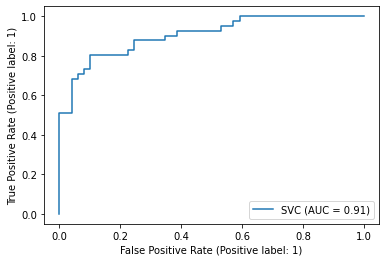

In [14]:
#plot_roc_curve(model,x_test,y_test)
plot_roc_curve(svm,x_test,y_test)

In [15]:
#import the logistic regression model
from sklearn.linear_model import LogisticRegression

#create the model
lr = LogisticRegression(C=5)

#train the model using training data set
lr.fit(x_train,y_train)

#predict the response for the test data
ypred_lr=lr.predict(x_test)


In [16]:

print("Test Accuracy {:.2f}%".format(acc))
filename = 'logisticRegression.pkl'
pickle.dump(lr, open(filename, 'wb'))
ypred_lr=lr.predict(x_test)
r=classification_report(y_test,ypred_lr)
c_matrix_lr=confusion_matrix(y_test, ypred_lr)
print(r)
print("confusion matrix of logistic regression\n",c_matrix_lr)

NameError: name 'acc' is not defined

In [ ]:
plot_roc_curve(lr,x_test,y_test)

In [ ]:
#import the Bernoulli Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

#create the model
nb = BernoulliNB()

#train the model
nb.fit(x_train, y_train)


#predict the response for the test data
ypred_nb=nb.predict(x_test)


In [ ]:
print(nb.predict(x_train[2:3]))
print('accuracy',nb.score(x_test,y_test)*100)
filename = 'nb.pkl'
pickle.dump(nb, open(filename, 'wb'))

In [ ]:
r=classification_report(y_test,ypred_nb)
c_matrix_nb=confusion_matrix(y_test, ypred_nb)
print(r)
print("confusion matrix of naive bayes\n",c_matrix_nb)

In [ ]:
plot_roc_curve(nb,x_test,y_test)

In [ ]:
#importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

#creating the model
rf=RandomForestClassifier(n_estimators=1000,random_state=10)

#training the model
rf.fit(x_train,y_train)

#predicting the response
ypred_rf=rf.predict(x_test)


In [ ]:

acc=rf.score(x_test,y_test)*100
print("Test Accuracy {:.2f}".format(acc))
filename = 'randomForest.pkl'
pickle.dump(rf, open(filename, 'wb'))
r=classification_report(y_test,ypred_rf)
c_matrix_rf=confusion_matrix(y_test, ypred_rf)
print(r)
print("confusion matrix of random forest\n",c_matrix_lr)

In [ ]:
plot_roc_curve(rf,x_test,y_test)

In [1]:
fig = plt.figure(figsize=(80,50))
fig = plot_roc_curve(rf,x_test,y_test)
fig=plot_roc_curve(lr,x_test,y_test,ax=fig.ax_)
fig=plot_roc_curve(nb,x_test,y_test,ax=fig.ax_)
fig = plot_roc_curve( svm, x_test, y_test, ax = fig.ax_)
fig.figure_.suptitle("ROC curve comparison")
plt.show()

NameError: name 'plt' is not defined

In [ ]:
#import the module
import pickle

#svm Model
filename = 'svm.pkl'
pickle.dump(svm, open(filename, 'wb'))

#logistic Regression model
filename = 'logisticRegression.pkl'
pickle.dump(lr, open(filename, 'wb'))

#Bernoulli Naive Bayes model
filename = 'nb.pkl'
pickle.dump(nb, open(filename, 'wb'))

#Random Forest Model
filename = 'randomForest.pkl'
pickle.dump(rf, open(filename, 'wb'))

# hypertuning the models

In [ ]:
from sklearn import svm
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,100],
            'kernel': ['rbf','linear','poly','sigmoid']
            
        }  
    },
    """'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,1000],
            'random_state': [10,1]
        }
    },"""
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,20]
        },
    
    'Naive_Bayes' : {
        'model': BernoulliNB(),
        'params': {
            'alpha': [0,1],
            'binarize': [0.0,0.1,0.2,1.0],
            'fit_prior': [True,False]
        }
    }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=7, return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df